In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # visualisation
from sklearn .model_selection import train_test_split  # split the data into training and validation
from sklearn.metrics import classification_report # to get precision and recall
from sklearn.linear_model import LogisticRegression  # algo to solve the problem statement
from sklearn.preprocessing import StandardScaler # scaling the data


In [4]:
# load the dataset
df = pd.read_csv('HR_dataset.csv')

In [5]:
# Print first 7 rows

target = df.pop('Salary')

df.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


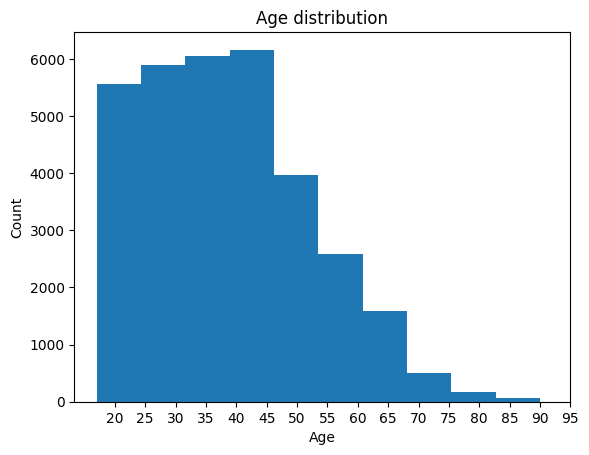

In [6]:
# check age distribution
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (7, 4)  # corrected this line
plt.xticks(np.arange(20, 100, 5))
plt.title('Age distribution')  # corrected this line
plt.show()


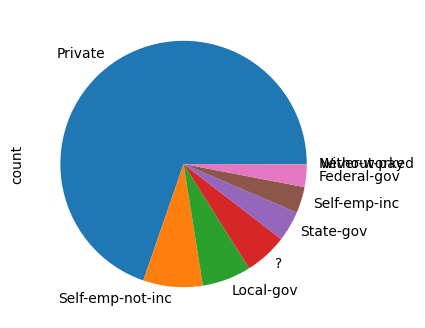

In [7]:
# check working class

df['Workclass'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.show()

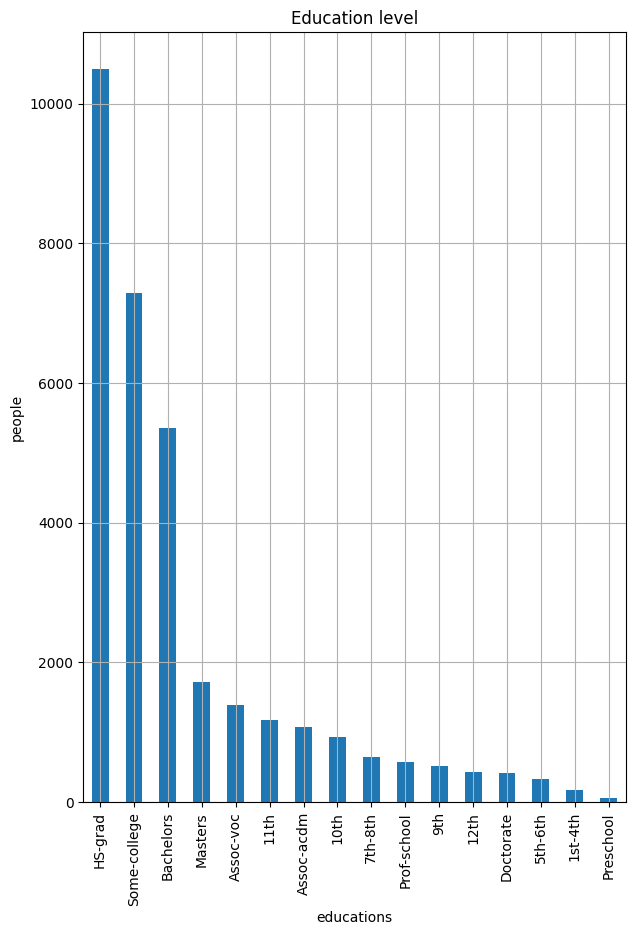

In [8]:
df ['Education'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (7,5)
plt.xlabel('educations')
plt.ylabel('people')
plt.title('Education level')
plt.grid()
plt.show()

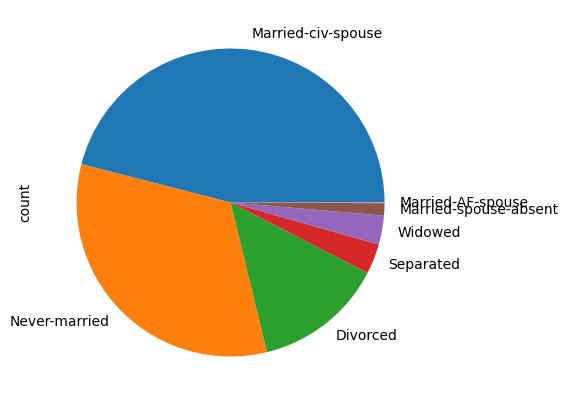

In [9]:
# checking marital status
df['Marital-status'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (7, 7)  # correct way to set figsize
plt.show()


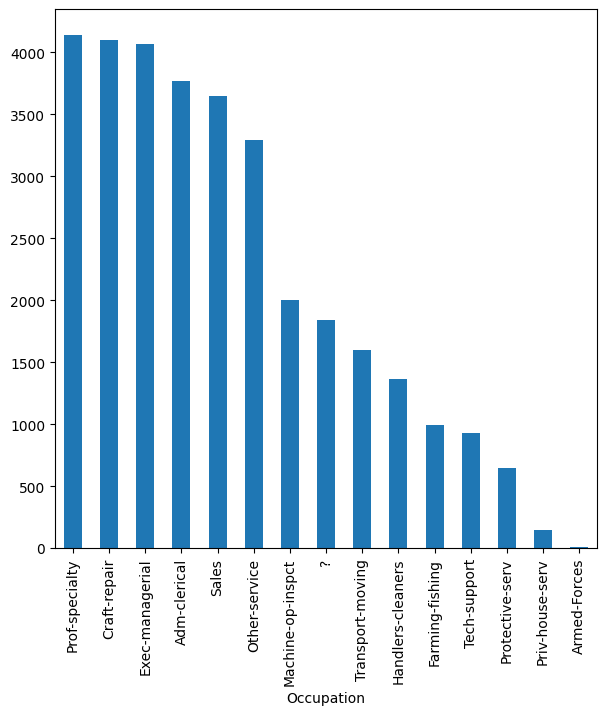

In [10]:
# Checking Occupation

df['Occupation'].value_counts().plot(kind='bar')
plt.show()

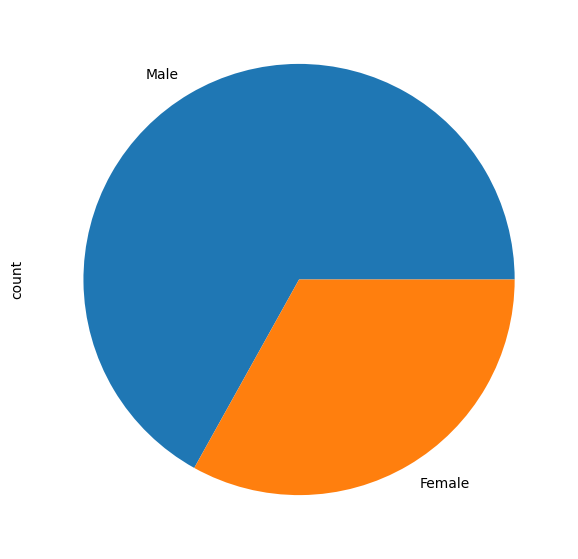

In [11]:
# Checking Gender

df['Sex'].value_counts().plot(kind='pie')
plt.show()

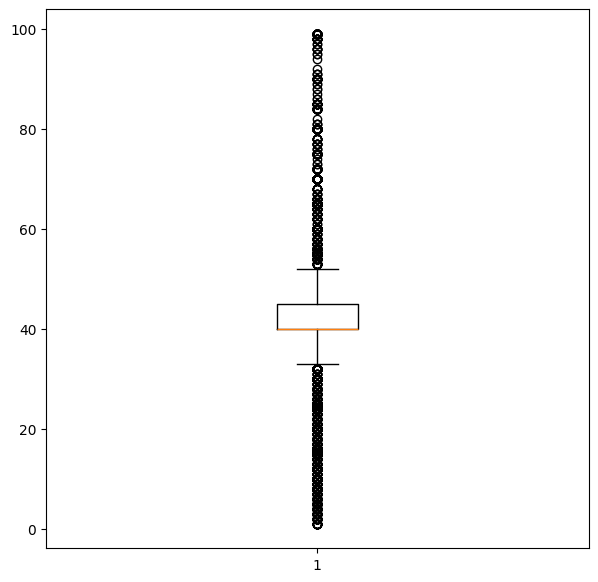

In [12]:
# Checking working hours

plt.boxplot(df['Hours-per-week'])
plt.show()

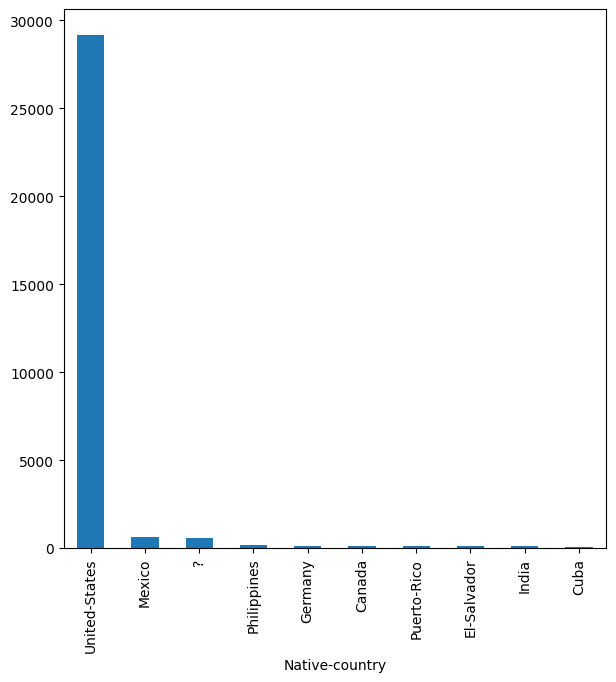

In [13]:
# Checking Country of Origin

df['Native-country'].value_counts().head(10).plot(kind='bar')
plt.rcParams['figure.figsize'] = (7, 4)
plt.show()

In [14]:
# converting textual columns to numeric

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}
for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])

df.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,0,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1


In [15]:
# since this is a binary classification, we will use logistic regression
# normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [16]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

In [17]:
# train the model
clf = LogisticRegression(max_iter=1000).fit(x_train, y_train)
pred = clf.predict(x_test)

print('Training Complete')

Training Complete


In [18]:
# generate report

print (classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      4942
        >50K       0.73      0.45      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.79      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513

